<a href="https://colab.research.google.com/github/goulartsursula/iniciacao-cientifica/blob/master/notebooks/jpsimumu-invariant_mass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-english/master/Data/Jpsimumu_Run2011A.csv')
df.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,75206813,G,10.16230,0.476262,-8.51642,5.52306,8.52973,0.609133,-1.514930,-1,G,19.77540,2.750800,-13.987100,13.705900,14.255000,0.853872,-1.376610,1,3.11319
1,165617,75678475,G,15.87990,15.061800,-1.66581,-4.74643,15.15360,-0.308313,-0.110151,1,G,11.93380,11.908400,-0.767017,-0.085117,11.933000,-0.007133,-0.064321,-1,4.11735
2,165617,74428554,G,21.82790,-6.221380,11.08450,17.74470,12.71110,1.135660,2.082250,-1,G,36.65130,-10.687400,15.069200,31.654400,18.474300,1.307610,2.187680,1,3.10098
3,165617,75193169,G,19.49230,2.761250,-5.57686,-18.47190,6.22301,-1.808380,-1.111050,1,G,14.93340,1.552490,-6.125350,-13.530200,6.319020,-1.505050,-1.322570,-1,2.33329
4,165617,74832715,G,8.09718,4.612670,-1.83886,6.39492,4.96570,1.071000,-0.379345,-1,T,3.51313,-0.530458,0.688020,3.402380,0.868767,2.074220,2.227600,1,4.56326


In [ ]:
len(df)

31892

In [3]:
df['m'] = np.sqrt(2*df['pt1']*df['pt2']*(np.cosh(df['eta1']-df['eta2']) - np.cos(df['phi1']-df['phi2'])))
nbins = 100
M_hist = np.histogram(df['m'], bins=nbins, range=(2,5)) #número de ocorrência em cada bin

[ 364  405  368  341  368  335  385  352  357  309  373  345  334  332
  300  291  305  300  266  320  280  269  288  279  291  281  263  249
  305  280  273  300  341  619 1489 3991 4780 2178  729  307  223  171
  175  183  151  147  146  147  132  121  137  151  131  154  214  320
  297  176  141  107   98   96   81  115   89   96   88  103   81  110
   96  103  105  104   84  106   97   76   87   89  102  103  104   98
   89   97   96  102   98   90   81   86   79   99   82  107   95   87
   68   58] [2.   2.03 2.06 2.09 2.12 2.15 2.18 2.21 2.24 2.27 2.3  2.33 2.36 2.39
 2.42 2.45 2.48 2.51 2.54 2.57 2.6  2.63 2.66 2.69 2.72 2.75 2.78 2.81
 2.84 2.87 2.9  2.93 2.96 2.99 3.02 3.05 3.08 3.11 3.14 3.17 3.2  3.23
 3.26 3.29 3.32 3.35 3.38 3.41 3.44 3.47 3.5  3.53 3.56 3.59 3.62 3.65
 3.68 3.71 3.74 3.77 3.8  3.83 3.86 3.89 3.92 3.95 3.98 4.01 4.04 4.07
 4.1  4.13 4.16 4.19 4.22 4.25 4.28 4.31 4.34 4.37 4.4  4.43 4.46 4.49
 4.52 4.55 4.58 4.61 4.64 4.67 4.7  4.73 4.76 4.79 4.82 4.85 4.88

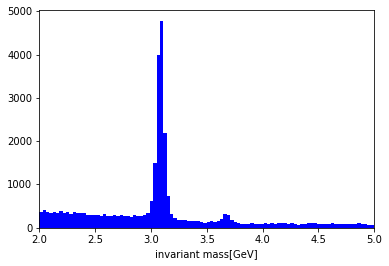

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt

hist, bins = M_hist
print(hist, bins)

width=1.0*(bins[1]-bins[0])
center = (bins[:-1] + bins[1:]) / 2 
plt.bar(center, hist, align='center', width=width, color='b', linewidth=0, edgecolor='b')
plt.xlabel('invariant mass[GeV]')
plt.xlim(2,5)
plt.show()

In [ ]:
ms = df[(df.Q1 != df.Q2) & ((df.Type1 == 'G') & (df.Type2 == 'G'))]
len(ms)
ms.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M,m
0,165617,75206813,G,10.1623,0.476262,-8.51642,5.52306,8.52973,0.609133,-1.514930,-1,G,19.7754,2.75080,-13.987100,13.705900,14.25500,0.853872,-1.376610,1,3.11319,3.105162
1,165617,75678475,G,15.8799,15.061800,-1.66581,-4.74643,15.15360,-0.308313,-0.110151,1,G,11.9338,11.90840,-0.767017,-0.085117,11.93300,-0.007133,-0.064321,-1,4.11735,4.111802
2,165617,74428554,G,21.8279,-6.221380,11.08450,17.74470,12.71110,1.135660,2.082250,-1,G,36.6513,-10.68740,15.069200,31.654400,18.47430,1.307610,2.187680,1,3.10098,3.093230
3,165617,75193169,G,19.4923,2.761250,-5.57686,-18.47190,6.22301,-1.808380,-1.111050,1,G,14.9334,1.55249,-6.125350,-13.530200,6.31902,-1.505050,-1.322570,-1,2.33329,2.323518
5,165617,74981507,G,30.5862,15.521800,5.12931,-25.85090,16.34740,-1.239060,0.319160,1,G,12.4868,7.76402,1.042470,-9.723280,7.83369,-1.042090,0.133471,-1,3.07267,3.063882


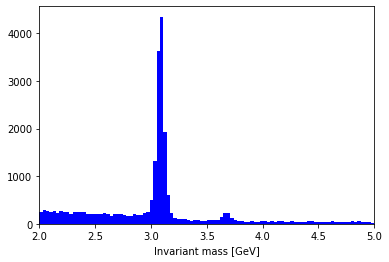

In [ ]:
M_hist = np.histogram(ms['m'], bins=nbins, range=(2,5))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='b', linewidth=0)
plt.xlabel('Invariant mass [GeV]')
plt.xlim(2,5)
plt.show()

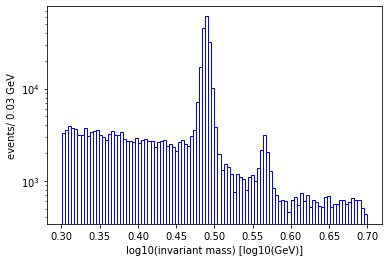

In [ ]:
weights = [nbins/np.log(10)/m for m in ms['m']]
M_hist = np.histogram(np.log10(ms['m']), bins=nbins, weights=weights, range=(np.log10(2),np.log10(5)))

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.yscale('log')
plt.xlabel('log10(invariant mass) [log10(GeV)]')
plt.ylabel('events/ 0.03 GeV')
plt.show()